# Practice week 2

## Computer vision

### AI Specialization


In [1]:
import cv2
print(cv2.__version__)

4.8.0


In [2]:
import skimage
print(skimage.__version__)

0.19.2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
image_color = cv2.imread("flower.jpeg")
image = cv2.imread("flower.jpeg")

In [8]:
def plot_cv_image(input_image, is_gray=False):
    """
    Converts an image from BGR to RGB and plots
    """
    #Change color channels order for matplotlib
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    
    #For easier view
    plt.axis('off')
    plt.show()

In [6]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

In [15]:
def plot_cv_image_gray(input_image):
    """
    Converts an image gray scale and plots
    """
    #Change color channels order for matplotlib
    gray_output = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) 
    plt.imshow(gray_output, cmap='gray')
    
    #For easier view
    plt.axis('off')
    plt.show()

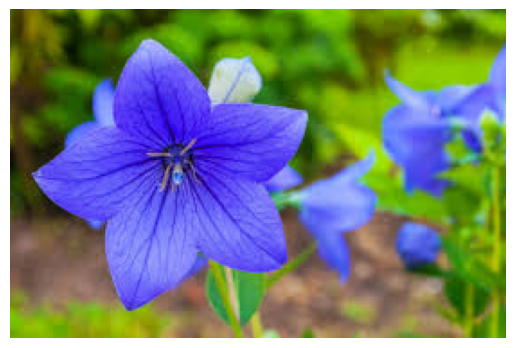

In [13]:
plot_cv_image(image_color)

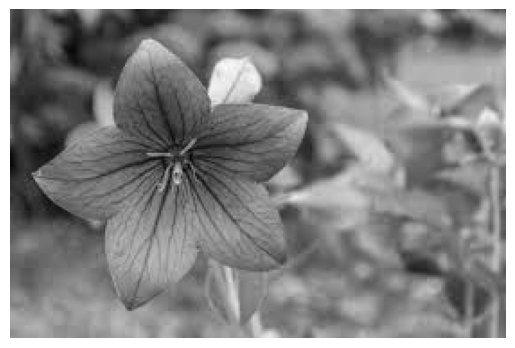

In [16]:
plot_cv_image_gray(image_color)

## Filters

### Salt and pepper filter:

In [18]:
# Initialize with zeros
import numpy as np
noise = np.zeros((400, 600))

In [23]:
# Fill the image with random numbers in given range and add noisy:
cv2.randu(noise, 0, 256)
noisy_gray = 1 + np.array(0.2*noise, dtype=int)

### Linear filters 1D:

In [33]:
def point_operation(img, K, L): 
    """ Applies point operation to given grayscale image """ 
    img = np.asarray(img, dtype=float) 
    img = img*K + L 
    # clip pixel v
    img[img > 255] = 255 
    img[img < 0] = 0 
    return np.asarray(img, dtype = int)


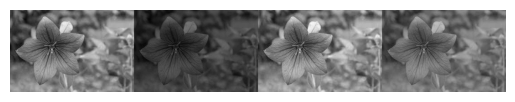

In [34]:
def main(): 
    # read an image 
    img = cv2.imread('flower.jpeg') 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # k = 0.5, l = 0 
    out1 = point_operation(gray, 0.5, 0) 
    # k = 1., l = 10 
    out2 = point_operation(gray, 1, 10) 
    # k = 0.8, l = 15 
    out3 = point_operation(gray, 0.7 ,25)
    
    res = np.hstack([gray,out1, out2, out3])
    plt.imshow(res, cmap='gray')
    plt.axis('off') 
    plt.show()

                           
if __name__ ==  '__main__':
    main()

### Linear filters 2D:

#### Kernel

In [39]:
# design a kernel matrix, here is uniform 5x5 
kernel = np.ones((5,5),np.float32)/25 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# apply on the input image, here grayscale input
dst = cv2.filter2D(gray,-1,kernel) 

In [40]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [41]:
dst

array([[ 70,  69,  67, ...,  97,  97,  97],
       [ 69,  69,  67, ..., 100, 100, 100],
       [ 68,  68,  66, ..., 109, 109, 108],
       ...,
       [131, 132, 133, ..., 111, 107, 106],
       [130, 131, 132, ..., 112, 108, 108],
       [130, 130, 132, ..., 112, 109, 108]], dtype=uint8)

In [43]:
def plot_cv_img(input_image, output_image): 
    """ Converts and plots  an image from BGR to RGB """
    fig, ax = plt.subplots(nrows=1, ncols=2) 
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)) 
    ax[0].set_title('Input Image') 
    ax[0].axis('off') 
    
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)) 
    ax[1].set_title('Box Filter (5,5)') 
    ax[1].axis('off') 
    plt.show()

#### Filter Kernel 5x5

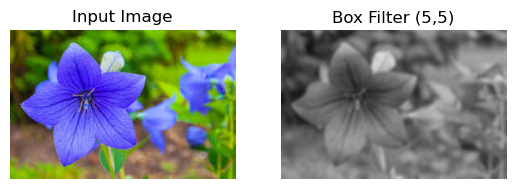

In [44]:
plot_cv_img(image_color, dst)

#### Filter Kernel 3x3

In [53]:
# design a kernel matrix, here is uniform 5x5 
kernel = np.ones((3,3),np.float32)/25 

# apply on the input image, here grayscale input
dst = cv2.filter2D(gray,-1,kernel) 

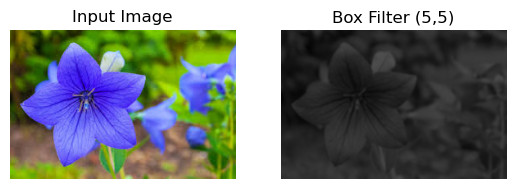

In [54]:
plot_cv_img(image_color, dst)

### Non-linear filters

#### Gaussian filter to blur image:

In [55]:
def plot_cv_img(input_image, output_image): 
    """ Converts and plots  an image from BGR to RGB """
    fig, ax = plt.subplots(nrows=1, ncols=2) 
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)) 
    ax[0].set_title('Input Image') 
    ax[0].axis('off') 
    
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)) 
    ax[1].set_title('Gaussian filter - Blurred') 
    ax[1].axis('off') 
    plt.show()

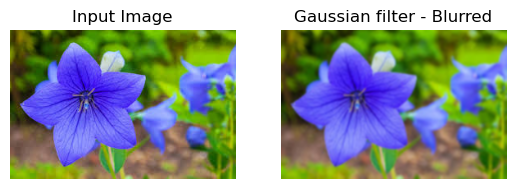

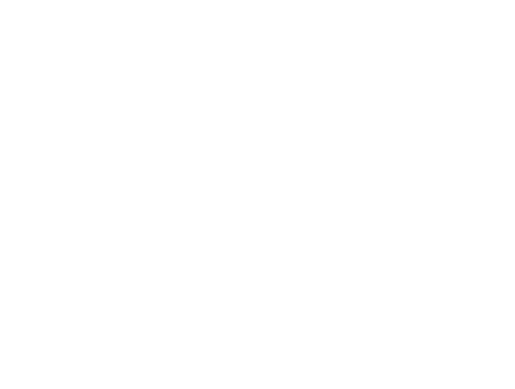

In [70]:
def main(): 
    # read an image 
    img = cv2.imread('flower.jpeg') 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # apply gaussian blur, # kernel of size 5x5, 
    # change here for other sizes 
    kernel_size = (5,5) 
    # sigma values are same in both direction 
    blur = cv2.GaussianBlur(img,kernel_size,0) 
    plot_cv_img(image, blur)
    plt.axis('off') 
    plt.show()

                           
if __name__ ==  '__main__':
    main()

### Histogram equalization

In [71]:
def plot_gray(input_image, output_image1, output_image2):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    fig, ax = plt.subplots(nrows=1, ncols=3)

    ax[0].imshow(input_image, cmap='gray')          
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    
    ax[1].imshow(output_image1, cmap='gray')          
    ax[1].set_title('Histogram Equalized ')
    ax[1].axis('off')    

    ax[2].imshow(output_image2, cmap='gray')          
    ax[2].set_title('Histogram Equalized ')
    ax[2].axis('off')
    
    # plt.savefig('../figures/03_histogram_equalized.png')

    plt.show()


In [72]:
def plot_hist_cdf(cdf_normalized, img):
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

In [76]:
def main():
    # read an image 
    img = cv2.imread('flower.jpeg')
    img = cv2.resize(img, (600,400))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    hist,bins = np.histogram(img[100:400, 100:400].flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    # # plot hist normalized 
    plot_hist_cdf(cdf_normalized, img[100:400, 100:400])
        
    equ = cv2.equalizeHist(gray)
    
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE()
    cl1 = clahe.apply(gray)
    
    plot_gray(gray, equ, cl1)
    

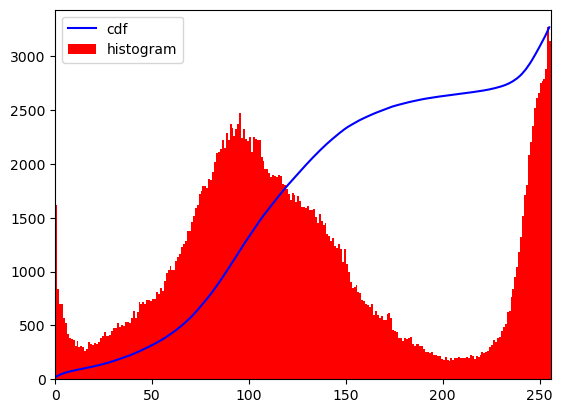

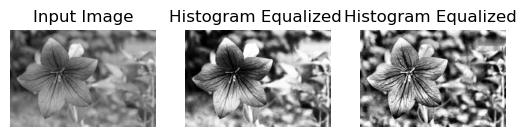

In [77]:
main()

#### Median filter

In [81]:
def plot_cv_img(input_image, output_image1, output_image2, output_image3):     
    """     
    Converts an image from BGR to RGB and plots     
    """   

    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))

    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))          
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    
    ax[1].imshow(cv2.cvtColor(output_image1, cv2.COLOR_BGR2RGB))          
    ax[1].set_title('Median Filter (3,3)')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(output_image2, cv2.COLOR_BGR2RGB))          
    ax[2].set_title('Median Filter (5,5)')
    ax[2].axis('off')    

    ax[3].imshow(cv2.cvtColor(output_image3, cv2.COLOR_BGR2RGB))          
    ax[3].set_title('Median Filter (7,7)')
    ax[3].axis('off')
    
    # plt.savefig('../figures/03_median_filter.png')

    plt.show()

In [82]:
def main():
    # read an image 
    img = cv2.imread('flower.jpeg')

    
    median1 = cv2.medianBlur(img,3)
    median2 = cv2.medianBlur(img,5)
    median3 = cv2.medianBlur(img,7)
    
    
    # Do plot
    plot_cv_img(img, median1, median2, median3)


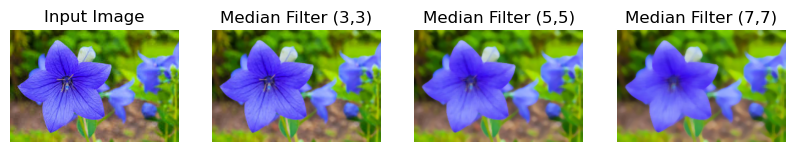

In [83]:
if __name__ == '__main__':
    main()

### Gradient filters

#### Soberl and Laplacian filters (Derivatives of first and second filter):

In [96]:
def plot_cv_img(input_image, output_image1, output_image2):     
    """     
    Converts an image from BGR to RGB and plots     
    """   

    fig, ax = plt.subplots(nrows=1, ncols=3)

    ax[0].imshow(input_image, cmap='gray')          
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    
    ax[1].imshow(output_image1, cmap='gray')          
    ax[1].set_title('Laplacian Image')
    ax[1].axis('off')

    ax[2].imshow(output_image2, cmap = 'gray')          
    ax[2].set_title('Laplacian of Gaussian')
    ax[2].axis('off')    
 
    #plt.savefig('../figures/03_image_derivatives_log.png')

    plt.show()
    

def main():
    # read an image 
    img = cv2.imread('flower.jpeg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # sobel 
    x_sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    y_sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

    # laplacian
    lapl = cv2.Laplacian(img,cv2.CV_64F, ksize=5)

    # gaussian blur
    blur = cv2.GaussianBlur(img,(5,5),0)
    
    # laplacian of gaussian
    log = cv2.Laplacian(blur,cv2.CV_64F, ksize=5)
    
    #res = np.hstack([img, x_sobel, y_sobel])
    #plt.imshow(res, cmap='gray')
    #plt.axis('off')
    #plt.show()
    #lapl = np.asarray(lapl, dtype= np.uint)
    # Do plot
    plot_cv_img(img, lapl, log)


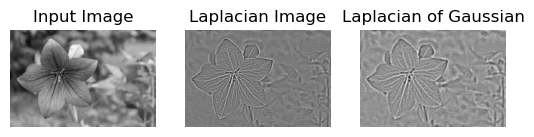

In [97]:
if __name__ == '__main__':
    main()

### Kind of transformations:

### Translation

In [98]:
def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off')
    plt.show()


In [124]:
def main():
    # read an image 
    img = cv2.imread('flower.jpeg')
    
    # Translation:
    # input shape
    w, h = img.shape[0], img.shape[1]
    
    # Create translation matrix:
    tx = w/2 # half of width
    ty = w/1 # half of heigth
    translation_matrix = np.float32([[1,0,tx],[0,1,ty]])
    
    # apply translation operation using warp affine 
    output_size = (w*2,h*2) 
    translated_flower = cv2.warpAffine(img, translation_matrix, output_size)
    
    # Do plot
    plot_cv_img(translated_flower)



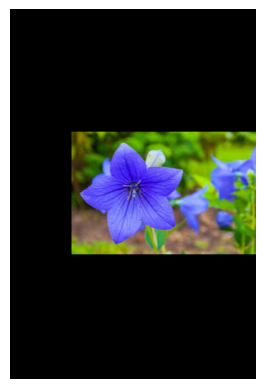

In [125]:
if __name__ == '__main__':
    main()

#### Rotation

In [126]:
def main():
    # read an image 
    img = cv2.imread('flower.jpeg')
    
    # Translation:
    # input shape
    w, h = img.shape[0], img.shape[1]
    
    # Create translation matrix:
    rot_angle = 90 # half of width
    scale = 1 # half of heigth
    rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), rot_angle, scale)
    
    # apply rotation  using warp affine 
    output_size = (w*2,h*2) 
    translated_flower = cv2.warpAffine(img, rotation_matrix, output_size)
    
    # Do plot
    plot_cv_img(translated_flower)

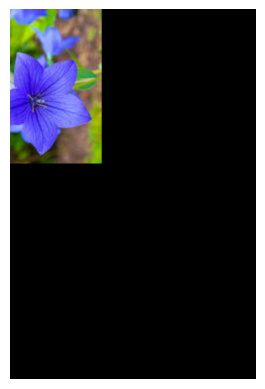

In [127]:
if __name__ == '__main__':
    main()

## Referencias:

1. Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.


2. Dadhich, Abhinav. Practical Computer Vision : Extract Insightful Information from Images Using TensorFlow, Keras, and OpenCV, Packt Publishing, Limited, 2018. ProQuest Ebook Central, https://ebookcentral.proquest.com/lib/bibliouniminuto-ebooks/detail.action?docID=5287235.